In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')


plt.style.use('seaborn-darkgrid')

## Exploring Data

In [2]:
database = pd.read_csv('../data/raw/house_data.csv')

# Dimension

database.shape

(10692, 13)

In [3]:
# Verify
database.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
database.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [5]:
database

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [6]:
database.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [7]:
database.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [8]:
# Verifying data type on the columns
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [9]:
# Type columns
database.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

## EDA

In [10]:
# Filtering type columns
categorical_columns = database.columns[database.dtypes == object]
numerical_columns = database.columns[database.dtypes != object]

In [11]:
categorical_columns

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [12]:
numerical_columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)'],
      dtype='object')

In [13]:
# Filtering categorical columns to percentage like

for column in categorical_columns:
    analysis = database[column].value_counts(normalize=True) * 100
    
    print(column)
    print(analysis)
    print('\n')

city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64


floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64


animal
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64


furniture
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64




In [14]:
# Correcting data

#Adjusting floor

database.loc[database.floor == '301']
database.iloc[2562,5] = 30

In [15]:
database.loc[database.floor == 30]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
2562,Belo Horizonte,80,3,2,2,30,acept,not furnished,750,2600,164


In [16]:
# Adjust '-'

database.floor = database.floor.apply(lambda register: 0 if register == '-' else register)
database.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [17]:
database.floor = pd.to_numeric(database.floor)
database.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                 int64
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

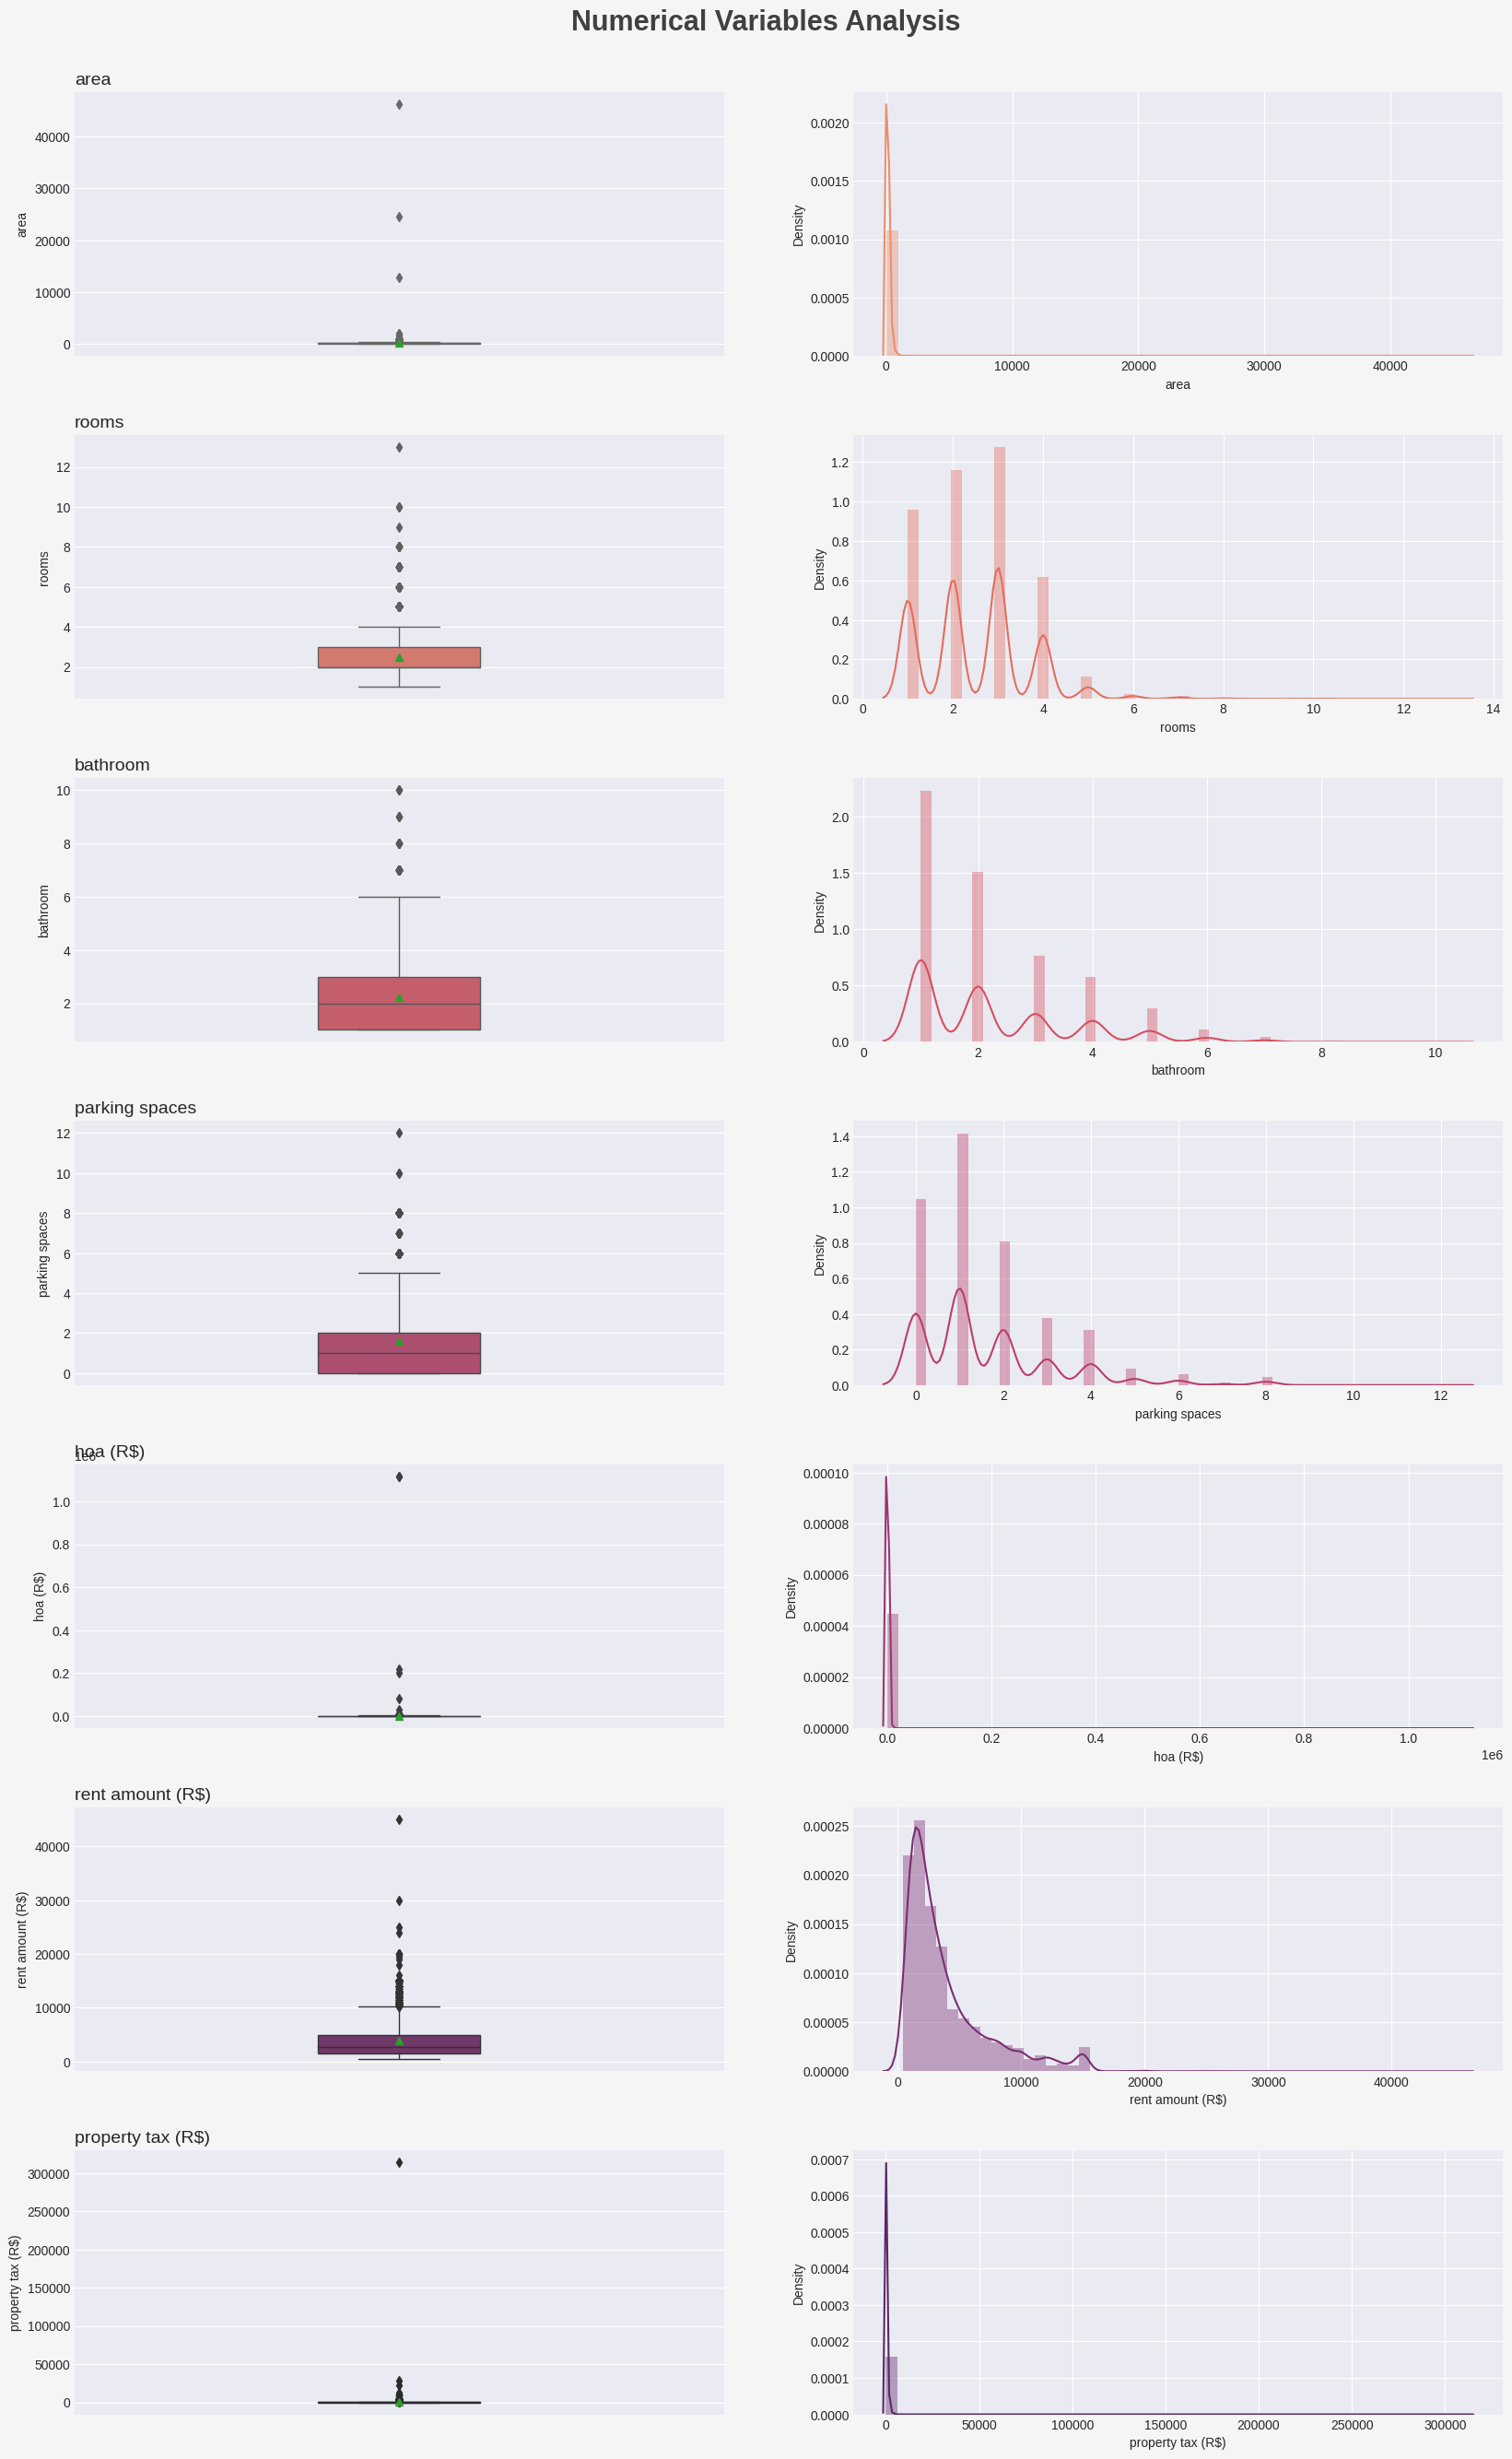

In [18]:
# Grid - Graphics

# Length
fig, axes = plt.subplots(figsize=(20,30))

# Background Color
background_color='#f5f5f5'
fig.set_facecolor(background_color)

# Color Palette
color_palette = sns.color_palette('flare', len(numerical_columns) * 2)

# Title
plt.suptitle("Numerical Variables Analysis", fontsize=22, color='#404040', fontweight=600)

# Structure
rows=len(numerical_columns)
cols= 2 # (Boxplot - Distplot)
pos=1


# Plotting graphics Loop
for col in numerical_columns:
    plt.subplot(rows, cols, pos)
    
    # Title
    plt.title(f"{col}", loc='left', fontsize=14, fontweight=200)
    
    
    # Plot
    sns.boxplot(data=database, y=col, showmeans=True, saturation=0.75,
                linewidth=1, color=color_palette[pos], width=0.25)
    
    
    pos += 1
    
    plt.subplot(rows, cols, pos)
    
    # Plot
    sns.distplot(database[col], color=color_palette[pos-1])
    
    pos += 1
    
# Grid adjustment
plt.subplots_adjust(top=0.95, hspace=0.3)
    

In [19]:
database.loc[database.area <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [20]:
database['hoa (R$)'].max()

1117000

In [21]:
database.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [22]:
database.loc[database['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

## Features engineering

In [26]:
# Adjust categorical columns
database.animal = database.animal.map({
    'not acept': 0,
    'acept':1
})

database.furniture = database.furniture.map({
    'not furnished': 0,
    'furnished': 1
})


# Filtering São Paulo
SP_filter = database.loc[database.city == 'São Paulo']

SP_filter.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [28]:
SP_filter.drop(columns=['city'], inplace=True)

In [29]:
x_label = SP_filter.drop(columns=['rent amount (R$)'])
y_label = SP_filter['rent amount (R$)']

In [30]:
x_label.shape, y_label.shape

((5887, 9), (5887,))

In [31]:
x_label.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [32]:
y_label.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

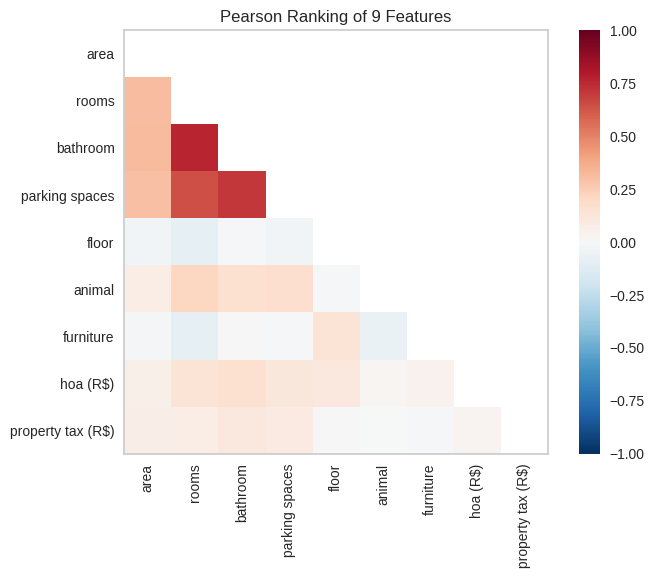

In [33]:
# Correlation using YellowBrick
from yellowbrick.features import Rank2D

# Define method

corr = Rank2D(algoritmo='pearson')

corr.fit(x_label, y_label)
corr.transform(x_label)

corr.show();


In [34]:
# Separe data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=10)


In [35]:
# Most relevant features
from sklearn.feature_selection import mutual_info_regression, SelectKBest

def select_features(x_train,Y_train):
    
    # Select features
    selection = SelectKBest(score_func=mutual_info_regression, k='all')
    
    # Fit Learning
    selection.fit(x_train, Y_train)
    
    return selection



scores = select_features(X_train, y_train)




In [40]:
for pos, score in enumerate(scores.scores_):
    print(f'{X_train.columns[pos]} : {score}')

area : 0.06502872771885082
rooms : 0.2625962131409829
bathroom : 0.32415855066752286
parking spaces : 0.244708253828279
floor : 0.030050608726683414
animal : 0.024988372243690993
furniture : 0.04178499769894106
hoa (R$) : 0.07052170689280324
property tax (R$) : 0.17184140217437127


## Model

In [41]:
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor(max_depth=5)

model_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [43]:
# Performance

prev = model_forest.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f"RMSE: { sqrt(mean_squared_error(y_test, prev))}")
print(f"Score: {r2_score(y_test, prev)}")

RMSE: 2450.7442368716224
Score: 0.5653019837963262


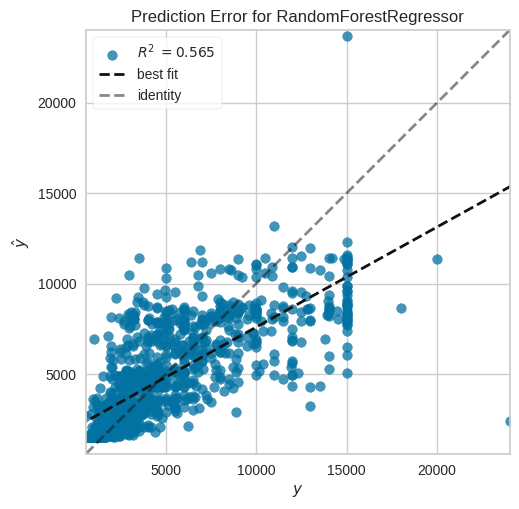

In [44]:
from yellowbrick.regressor import PredictionError

error_model = PredictionError(model_forest)

error_model.fit(X_train, y_train)
error_model.score(X_test, y_test)
error_model.show();

## Exporting

In [46]:
import joblib

joblib.dump(model_forest, '../models/forest_model_v1_0_0.pkl')

['../models/forest_model_v1_0_0.pkl']

In [47]:
# Testing trained model

on_disk_model = joblib.load('../models/forest_model_v1_0_0.pkl')

In [48]:
on_disk_model

RandomForestRegressor(max_depth=5)

In [49]:
on_disk_model.predict(X_test.head(1).values)

array([1528.71437654])